# **CIFAR10 CNN**

In [1]:
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [2]:
(xtr,ytr),(xte,yte)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
xtr.shape

(50000, 32, 32, 3)

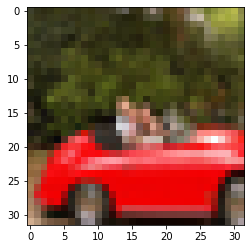

In [4]:
plt.imshow(xtr[99], cmap='gray')

In [5]:
ytr[99]

array([1], dtype=uint8)

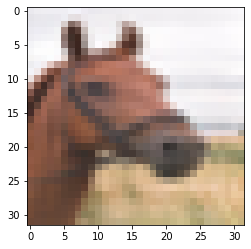

In [6]:
plt.imshow(xte[99], cmap='gray')

In [7]:
yte[99]

array([7], dtype=uint8)

In [8]:
ytr=tcg(ytr)
yte=tcg(yte)

In [9]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],3).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],3).astype('float32')/255

In [10]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=15, batch_size=128)

Epoch 1/15
391/391 [==============================] - 9s 22ms/step - loss: 1.7354 - accuracy: 0.3525 - val_loss: 1.3565 - val_accuracy: 0.5035
Epoch 2/15
391/391 [==============================] - 8s 20ms/step - loss: 1.3799 - accuracy: 0.5024 - val_loss: 1.1836 - val_accuracy: 0.5825
Epoch 3/15
391/391 [==============================] - 8s 20ms/step - loss: 1.2266 - accuracy: 0.5608 - val_loss: 1.0412 - val_accuracy: 0.6354
Epoch 4/15
391/391 [==============================] - 8s 20ms/step - loss: 1.1163 - accuracy: 0.6024 - val_loss: 0.9727 - val_accuracy: 0.6562
Epoch 5/15
391/391 [==============================] - 8s 20ms/step - loss: 1.0424 - accuracy: 0.6311 - val_loss: 0.9144 - val_accuracy: 0.6702
Epoch 6/15
391/391 [==============================] - 8s 20ms/step - loss: 0.9896 - accuracy: 0.6501 - val_loss: 0.8688 - val_accuracy: 0.6953
Epoch 7/15
391/391 [==============================] - 8s 20ms/step - loss: 0.9381 - accuracy: 0.6688 - val_loss: 0.8401 - val_accuracy: 0.7060

In [13]:
model.evaluate(xtr,ytr)

1563/1563 [==============================] - 7s 5ms/step - loss: 0.5413 - accuracy: 0.8147


[0.5412554144859314, 0.8147000074386597]

In [14]:
score = model.evaluate(xte,yte)

313/313 [==============================] - 2s 5ms/step - loss: 0.6802 - accuracy: 0.7627


In [15]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6801927089691162
Test accuracy: 0.7627000212669373


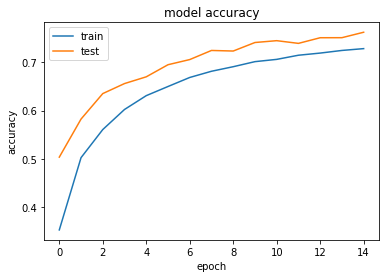

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

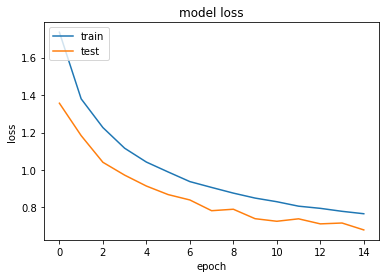

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model.save("CNN_cifar.h5")

In [19]:
model.load_weights("CNN_cifar.h5")

In [20]:
loaded_model = tf.keras.models.load_model("CNN_cifar.h5")

loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0

In [21]:
xte.shape

(10000, 32, 32, 3)

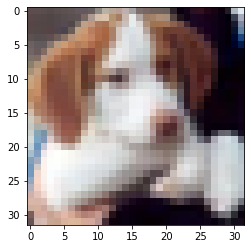

In [22]:
plt.imshow(xte[16])

In [23]:
img=xte[16].reshape(1, 32, 32, 3)

In [24]:
print("Predicted sign: "+ str( 
        loaded_model.predict(img)))

Predicted sign: [[2.4529782e-05 2.7666442e-06 1.4074640e-03 1.5445259e-01 4.5365865e-05
  8.4310812e-01 2.0173406e-04 7.3033629e-04 2.5242853e-05 1.7506227e-06]]


In [25]:
print("Predicted Sign" + str(loaded_model.predict_classes(img)))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Predicted Sign[5]
